
# 1. Data Understanding & Preprocessing
* Load the dataset and inspect its structure.
* Convert TotalCharges from object to numeric.
* Check and handle missing values.
* Encode categorical variables:
* Label encoding for binary columns.
* One-hot encoding for multi-category columns.
* Scale numerical features: tenure, MonthlyCharges, TotalCharges.
# 2. SOME ANALYSIS OF THE DATASET.......
## Explore the distribution of Churn.
* Bivariate Analysis:
* Compare churn rates across Contract types.
* Explore churn based on tenure, MonthlyCharges, TotalCharges.
* Investigate churn patterns related to SeniorCitizen, Partner, Dependents, and MultipleLines.
* Churn Analysis: 
* Examine churn across key columns like Contract, PaymentMethod, InternetService, and tenure.
## 3. Exploratory Data Analysis (EDA)
* EDA REPORT
# 4. Modeling
* Split data into training and testing sets (e.g., 80:20 ratio).
* Train classification models:
* Logistic Regression
* Random Forest
* Gradient Boosting (XGBoost/LightGBM)
* Support Vector Machine (SVM)
* Evaluate models using:
* Accuracy, Precision, Recall, F1-Score, ROC-AUC.























































































* Improve services for seniors, if needed.

In [1]:
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go
import numpy as np
from ydata_profiling import ProfileReport 
import warnings
warnings.filterwarnings('ignore') 


In [2]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# DATA PREPROCESSING


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
# HERE WE ARE CONVERTING THE TOTAL CHERGES COLUMN TO NUMERIC OS THAT WE CAN DO WORK WITH IT EFFECTIVELY...
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors= 'coerce')

In [7]:
# HERE WE HAVE FOUND SOME NAN VALUES IN THE TOTAL CHARGES COLUMN .....
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
fig = px.box(df , y  = 'TotalCharges')
fig.show()

***TEHRE IS NO OUTLIER IN THIS COLUMN ITS GREAT***

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# HERE WE ARE FILLING THE NANs..........
df['TotalCharges'] = df['TotalCharges'].fillna(1395.475) # its a median value which we are giving to the NAN........

In [11]:
# CHECKING THE NAN AGAIN IF THEY ARE ....... BUT TEHR ARE NOT...HAHAHAHAH........
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# Drop the customerID column
df = df.drop(columns=['customerID']) # as it is not needed in the analysis and in the modelling........

# SOME ANALYSIS OF THE DATASET

In [13]:
# Churn distribution
churn_distribution = df['Churn'].value_counts().reset_index()
churn_distribution.columns = ['Churn', 'Count']

# Plotting the distribution of Churn
fig = px.pie(churn_distribution, values='Count', names='Churn', title='Churn Distribution')
fig.show()


In [14]:
# Churn rate by Contract type
contract_churn = df.groupby(['Contract', 'Churn']).size().reset_index(name='Count')

# Plotting churn rates by Contract type
fig = px.bar(contract_churn, x='Contract', y='Count', color='Churn', barmode='group', 
             title='Churn Rates by Contract Type', 
             labels={'Churn': 'Churn Status', 'Count': 'Number of Customers'})
fig.show()


In [15]:
# Churn rate based on SeniorCitizen
senior_churn = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')

# Plotting churn rates by SeniorCitizen status
fig_senior = px.bar(senior_churn, x='SeniorCitizen', y='Count', color='Churn', barmode='group', 
                    title='Churn Rates by Senior Citizen Status')
fig_senior.show()

# Similarly, you can create plots for Partner, Dependents, and MultipleLines
partner_churn = df.groupby(['Partner', 'Churn']).size().reset_index(name='Count')
fig_partner = px.bar(partner_churn, x='Partner', y='Count', color='Churn', barmode='group', 
                     title='Churn Rates by Partner Status')
fig_partner.show()

dependents_churn = df.groupby(['Dependents', 'Churn']).size().reset_index(name='Count')
fig_dependents = px.bar(dependents_churn, x='Dependents', y='Count', color='Churn', barmode='group', 
                        title='Churn Rates by Dependents Status')
fig_dependents.show()

multiple_lines_churn = df.groupby(['MultipleLines', 'Churn']).size().reset_index(name='Count')
fig_multiple_lines = px.bar(multiple_lines_churn, x='MultipleLines', y='Count', color='Churn', barmode='group', 
                            title='Churn Rates by Multiple Lines Status')
fig_multiple_lines.show()


In [16]:
# Churn analysis across key columns
columns_of_interest = ['Contract', 'PaymentMethod', 'InternetService', 'tenure']
for column in columns_of_interest:
    churn_analysis = df.groupby([column, 'Churn']).size().reset_index(name='Count')
    fig = px.bar(churn_analysis, x=column, y='Count', color='Churn', barmode='group', 
                 title=f'Churn Rates by {column} Type')
    fig.show()


# Label encoding for binary columns.

In [17]:
from sklearn.preprocessing import LabelEncoder

# List of binary columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to each binary column
for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [18]:
# HERE YOU CHECK THE IMPLEMENTATION RESULT OF LABEL ENCODING ON THE BINARY COLUMNS.......
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


# ONE HOT ENCODING FOR THE CATEGORICAL COLUMNS 

In [19]:
# One-hot encode the multi-category columns
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines',
                                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                                 'TechSupport', 'StreamingTV', 'StreamingMovies'], drop_first=True)
                                                                                    # 'drop_first=True' ensures that one category is dropped to avoid multicollinearity
    
# Convert all boolean columns to integers (True -> 1, False -> 0)
df = df.astype(int)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   gender                                 7043 non-null   int64
 1   SeniorCitizen                          7043 non-null   int64
 2   Partner                                7043 non-null   int64
 3   Dependents                             7043 non-null   int64
 4   tenure                                 7043 non-null   int64
 5   PhoneService                           7043 non-null   int64
 6   PaperlessBilling                       7043 non-null   int64
 7   MonthlyCharges                         7043 non-null   int64
 8   TotalCharges                           7043 non-null   int64
 9   Churn                                  7043 non-null   int64
 10  InternetService_Fiber optic            7043 non-null   int64
 11  InternetService_No            

In [21]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,1,0,1,29,29,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,34,1,0,56,1889,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,2,1,1,53,108,1,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,45,0,0,42,1840,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70,151,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84,1990,0,...,0,0,0,1,0,1,0,1,0,1
7039,0,0,1,1,72,1,1,103,7362,0,...,0,1,0,1,0,0,0,1,0,1
7040,0,0,1,1,11,0,1,29,346,0,...,0,0,0,0,0,0,0,0,0,0
7041,1,1,1,0,4,1,1,74,306,1,...,0,0,0,0,0,0,0,0,0,0


# NUMERICAL FEATURE SCALING 

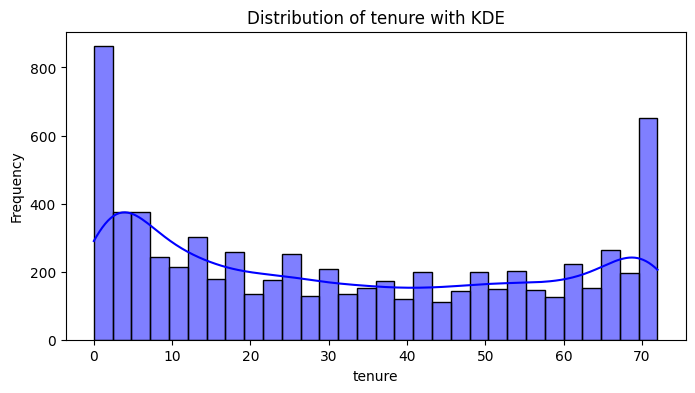

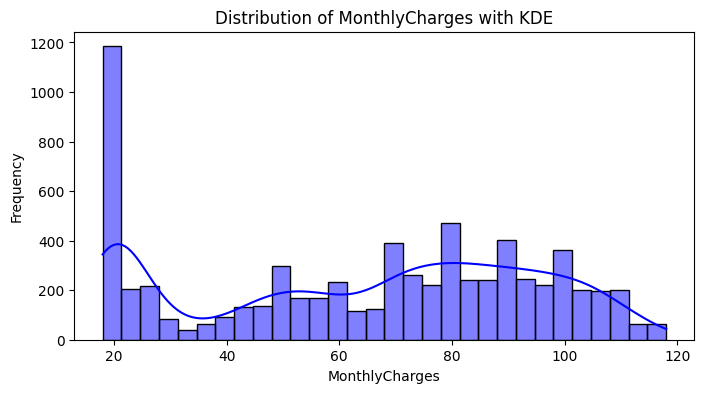

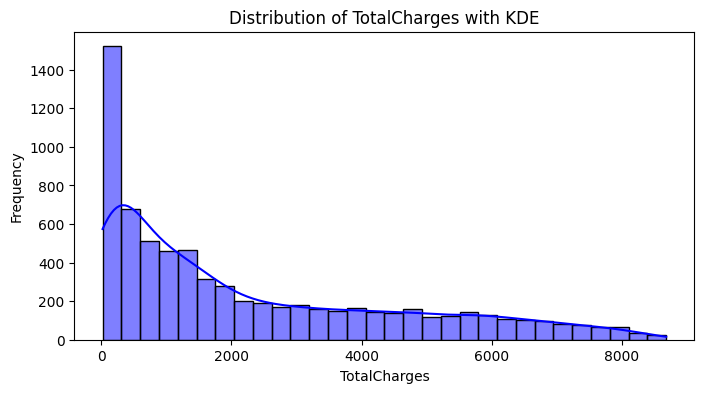

In [22]:
#  HERE WE ARE SEENING THE DISTRIBUTION OF THE NUNERICAL FEATURES IF THEY ARE NORMALLY DISTRIBUTED THAN WE WILL USE THE "STANDARDISATION" BUT IF THEY ARE NOT NORMALLY DISTRIBUTED THAN WE WILL USE THE NORMALIZATION ( MEANS MINMAX SCALLING )........ 

import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to check for normal distribution
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot histograms with KDE
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col} with KDE')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


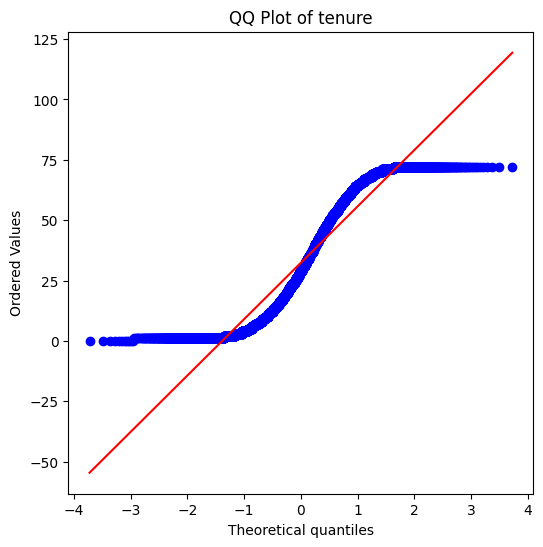

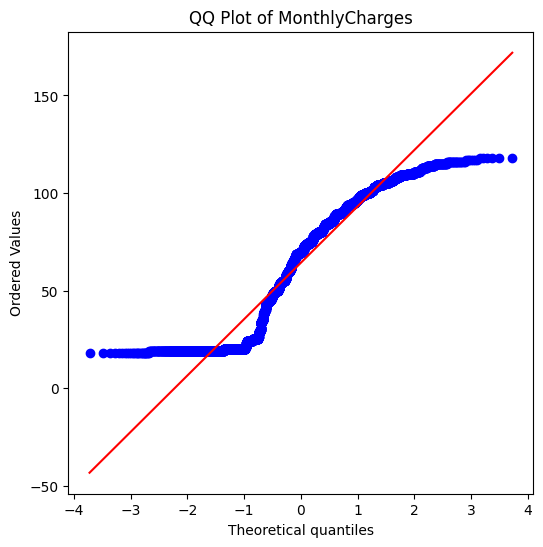

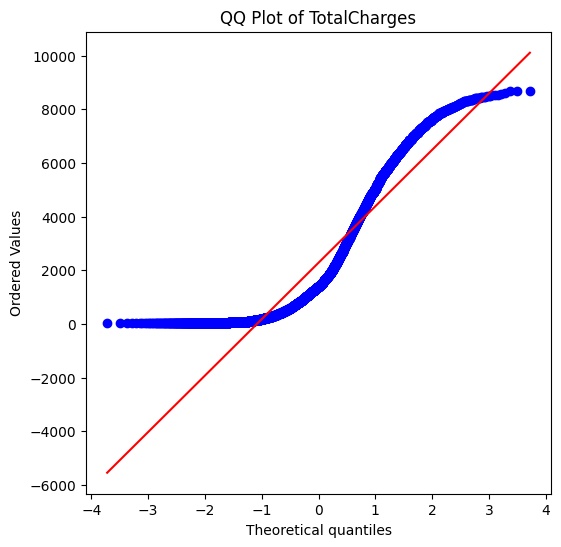

In [23]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Plot QQ plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(6, 6))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {col}')
    plt.show()


*AS WE CAN CLEARLY SEE IN THE CHARTS THAT THESE COLUMNS ARE NOT NORMALLY DISTRIBUTED SO WE WILL USE THE NORMALIZATION TO SCALE THESE FEATURES........*

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Normalization of numerical features
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [25]:
# LET'S CHECK THE DATA AGAIN..........
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,0.013889,0,1,0.11,0.001269,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0.472222,1,0,0.38,0.215901,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0.027778,1,1,0.35,0.010385,1,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0.625000,0,0,0.24,0.210247,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0.027778,1,1,0.52,0.015347,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,0.66,0.227556,0,...,0,0,0,1,0,1,0,1,0,1
7039,0,0,1,1,1.000000,1,1,0.85,0.847450,0,...,0,1,0,1,0,0,0,1,0,1
7040,0,0,1,1,0.152778,0,1,0.11,0.037849,0,...,0,0,0,0,0,0,0,0,0,0
7041,1,1,1,0,0.055556,1,1,0.56,0.033233,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# ahh ... DUPLICATESSS......NO WORRIES WE WILL CLEAR THEM........
df.duplicated().sum()

149

In [27]:
df.drop_duplicates(inplace = True)

In [28]:
# now we don't have duplicatess........
df.duplicated().sum()

0

NOW DATASET IS READY FOR FURTHER TASKS............

# EDA ( Exploratory Data Analysis )

In [29]:
# EAD REPORT WHCIH IS TELLING MOST OF THE THINGS ABOUT DATASET...........
report = ProfileReport(df, dark_mode= True , title = 'EDA REPORT ')

report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# DATA MODELING

In [30]:
from sklearn.model_selection import train_test_split

# Assuming your target column is 'Churn' and the rest are features
X = df.drop(columns='Churn')  # Features
y = df['Churn']  # Target

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


**Now, we'll train the following classification models:**

* Logistic Regression
* Random Forest
* Gradient Boosting (XGBoost or LightGBM)
* Support Vector Machine (SVM)

**We will evaluate all of these models on the test set.**

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

print(f"Logistic Regression - Accuracy: {log_reg_accuracy}, Precision: {log_reg_precision}, Recall: {log_reg_recall}, F1-Score: {log_reg_f1}, ROC-AUC: {log_reg_roc_auc}")


Logistic Regression - Accuracy: 0.8034807831762146, Precision: 0.6426229508196721, Recall: 0.547486033519553, F1-Score: 0.5912518853695324, ROC-AUC: 0.8431390519755525


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print(f"Random Forest - Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1-Score: {rf_f1}, ROC-AUC: {rf_roc_auc}")


Random Forest - Accuracy: 0.7940536620739667, Precision: 0.6360294117647058, Recall: 0.48324022346368717, F1-Score: 0.5492063492063491, ROC-AUC: 0.8237364507356683


In [33]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_roc_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

print(f"XGBoost - Accuracy: {xgb_accuracy}, Precision: {xgb_precision}, Recall: {xgb_recall}, F1-Score: {xgb_f1}, ROC-AUC: {xgb_roc_auc}")


XGBoost - Accuracy: 0.7759245830311821, Precision: 0.5808580858085809, Recall: 0.49162011173184356, F1-Score: 0.5325264750378215, ROC-AUC: 0.8181908962075738


In [34]:
from sklearn.svm import SVC

# Train SVM (with probability=True to get probabilities for ROC-AUC)
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluate
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_roc_auc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])

print(f"SVM - Accuracy: {svm_accuracy}, Precision: {svm_precision}, Recall: {svm_recall}, F1-Score: {svm_f1}, ROC-AUC: {svm_roc_auc}")


SVM - Accuracy: 0.8005801305293692, Precision: 0.6509090909090909, Recall: 0.5, F1-Score: 0.5655608214849921, ROC-AUC: 0.8050396970874211


In [35]:
# Create a DataFrame with the results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM'],
    'Accuracy': [log_reg_accuracy, rf_accuracy, xgb_accuracy, svm_accuracy],
    'Precision': [log_reg_precision, rf_precision, xgb_precision, svm_precision],
    'Recall': [log_reg_recall, rf_recall, xgb_recall, svm_recall],
    'F1-Score': [log_reg_f1, rf_f1, xgb_f1, svm_f1],
    'ROC-AUC': [log_reg_roc_auc, rf_roc_auc, xgb_roc_auc, svm_roc_auc]
})

results

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.803481,0.642623,0.547486,0.591252,0.843139
1,Random Forest,0.794054,0.636029,0.483240,0.549206,0.823736
2,XGBoost,0.775925,0.580858,0.491620,0.532526,0.818191
3,SVM,0.800580,0.650909,0.500000,0.565561,0.805040


**YOU CAN SEE THE BEST MODEL IS LOGISTIC REGRESSION BECAUSE IT HAS PERFORMED WELL AMONG THE ALL MODELS....**

***I HOPE YOU LIKED THE PROJECT.....***